In [1]:
import datetime

from sqlalchemy import (Boolean, Column, Float, ForeignKey, Integer, String,
                        select)

import stock

[2022-08-27 09:07:29 INFO /home/kitamura/work/stock/stock/__init__.py at line 44] Set new `StreamHandler` instance to the logger.
2022-08-27 09:07:29,089 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 09:07:29,090 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("companies")
2022-08-27 09:07:29,090 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 09:07:29,091 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("companies")
2022-08-27 09:07:29,092 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 09:07:29,092 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stock_time_series")
2022-08-27 09:07:29,093 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 09:07:29,093 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("stock_time_series")
2022-08-27 09:07:29,094 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 09:07:29,094 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("statistics")
2022-08-27 09:07:29,095 INFO sqlalchemy.engine.Engine [raw sql] 

In [2]:
stock.adapter.store_statistics("DDOG")

2022-08-27 09:07:31,330 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 09:07:31,334 INFO sqlalchemy.engine.Engine INSERT INTO statistics (archive_date, company_code, "52WeekChange", "SandP52WeekChange", "annualHoldingsTurnover", "annualReportExpenseRatio", beta, "beta3Year", "bookValue", category, "dateShortInterest", "earningsQuarterlyGrowth", "enterpriseToEbitda", "enterpriseToRevenue", "enterpriseValue", "fiveYearAverageReturn", "floatShares", "forwardEps", "forwardPE", "fundFamily", "fundInceptionDate", "heldPercentInsiders", "heldPercentInstitutions", "impliedSharesOutstanding", "lastCapGain", "lastDividendDate", "lastDividendValue", "lastFiscalYearEnd", "lastSplitDate", "lastSplitFactor", "legalType", "morningStarOverallRating", "morningStarRiskRating", "mostRecentQuarter", "netIncomeToCommon", "nextFiscalYearEnd", "pegRatio", "priceHint", "priceToBook", "priceToSalesTrailing12Months", "revenueQuarterlyGrowth", "sharesOutstanding", "sharesPercentSharesOut", "sharesShor

True

In [3]:
stock.adapter.store_stock_time_series("DDOG")

2022-08-27 09:07:32,586 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 09:07:32,592 INFO sqlalchemy.engine.Engine INSERT INTO stock_time_series (company_code, timestamp, interval, open, close, high, low, volume) VALUES (?, ?, ?, ?, ?, ?, ?, ?)
2022-08-27 09:07:32,592 INFO sqlalchemy.engine.Engine [generated in 0.00066s] ('DDOG', 1661520600, 60.0, 109.83000183105469, 110.9800033569336, 111.25, 109.79000091552734, 75342)
2022-08-27 09:07:32,594 INFO sqlalchemy.engine.Engine INSERT INTO stock_time_series (company_code, timestamp, interval, open, close, high, low, volume) VALUES (?, ?, ?, ?, ?, ?, ?, ?)
2022-08-27 09:07:32,594 INFO sqlalchemy.engine.Engine [cached since 0.00245s ago] ('DDOG', 1661520660, 60.0, 110.77999877929688, 110.69000244140625, 110.77999877929688, 110.69000244140625, 694)
2022-08-27 09:07:32,595 INFO sqlalchemy.engine.Engine INSERT INTO stock_time_series (company_code, timestamp, interval, open, close, high, low, volume) VALUES (?, ?, ?, ?, ?, ?, ?, ?)
2022

True

In [2]:
data = stock.scraping.yahoo_finance.get_stock_time_series("DDOG")

In [6]:
database = stock.models.database.Database()
database.create_all()
stats = stock.scraping.yahoo_finance.get_statistics("DDOG")

2022-08-27 07:59:30,434 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 07:59:30,435 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("companies")
2022-08-27 07:59:30,435 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 07:59:30,436 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("companies")
2022-08-27 07:59:30,436 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 07:59:30,437 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stock_time_series")
2022-08-27 07:59:30,437 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 07:59:30,438 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("stock_time_series")
2022-08-27 07:59:30,438 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 07:59:30,439 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("statistics")
2022-08-27 07:59:30,439 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-08-27 07:59:30,440 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("statistics")
2022-08-27 07:59:30,440 INFO sqlalch

In [7]:
stats["archive_date"] = datetime.datetime.now()
stats["company_code"] = "DDOG"

with database.context() as db:
    company=stock.models.models.Company(code="DDOG")
    
    db.add(company)
    db.add(stock.models.models.Statistics(**stats))
    db.commit()

2022-08-27 07:59:37,384 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 07:59:37,386 INFO sqlalchemy.engine.Engine INSERT INTO companies (code) VALUES (?)
2022-08-27 07:59:37,386 INFO sqlalchemy.engine.Engine [generated in 0.00071s] ('DDOG',)
2022-08-27 07:59:37,391 INFO sqlalchemy.engine.Engine INSERT INTO statistics (archive_date, company_code, "52WeekChange", "SandP52WeekChange", "annualHoldingsTurnover", "annualReportExpenseRatio", beta, "beta3Year", "bookValue", category, "dateShortInterest", "earningsQuarterlyGrowth", "enterpriseToEbitda", "enterpriseToRevenue", "enterpriseValue", "fiveYearAverageReturn", "floatShares", "forwardEps", "forwardPE", "fundFamily", "fundInceptionDate", "heldPercentInsiders", "heldPercentInstitutions", "impliedSharesOutstanding", "lastCapGain", "lastDividendDate", "lastDividendValue", "lastFiscalYearEnd", "lastSplitDate", "lastSplitFactor", "legalType", "morningStarOverallRating", "morningStarRiskRating", "mostRecentQuarter", "netIncomeToComm

In [9]:
with database.context() as db:
    stmt = select(stock.models.models.Company)
    obj = db.execute(stmt).one()[0]

2022-08-27 07:59:50,840 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-08-27 07:59:50,841 INFO sqlalchemy.engine.Engine SELECT companies.code 
FROM companies
2022-08-27 07:59:50,842 INFO sqlalchemy.engine.Engine [cached since 11.57s ago] ()
2022-08-27 07:59:50,844 INFO sqlalchemy.engine.Engine ROLLBACK


In [12]:
obj[0].code

'DDOG'

In [8]:
import json

In [5]:
url = "https://query1.finance.yahoo.com/v8/finance/chart/DDOG?region=US&lang=en-US&includePrePost=true&interval=1m&range=1d"

In [6]:
ua = UserAgent()
header = {
    "User-Agent": ua.chrome
}
r = requests.get(url, headers=header)

In [7]:
data = json.loads(r.text)

In [9]:
chart = data["chart"]["result"][0]

In [10]:
chart.keys()

dict_keys(['meta', 'timestamp', 'indicators'])

In [11]:
timestamp = chart["timestamp"]
start = chart["indicators"]["quote"][0]["open"]
end = chart["indicators"]["quote"][0]["close"]
high = chart["indicators"]["quote"][0]["high"]
low = chart["indicators"]["quote"][0]["low"]
volume = chart["indicators"]["quote"][0]["volume"]

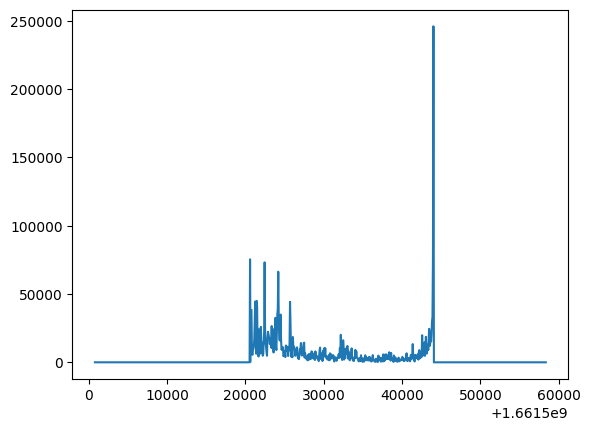

In [12]:
import matplotlib.pyplot as plt

plt.plot(timestamp, volume)

In [14]:
[idx for idx,val in enumerate(volume) if val is None]

[81]

In [15]:
volume[70:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 75342,
 694,
 None,
 38086,
 7333,
 5489,
 8733,
 9649,
 11743,
 16857,
 30246,
 44437,
 17253,
 6282,
 44942,
 41016,
 11920,
 21863,
 4268,
 24164,
 14895]

In [4]:
from fake_useragent import UserAgent
import requests
import re
import json

In [4]:
import pandas as pd

In [5]:
url = "https://finance.yahoo.com/quote/DDOG/key-statistics?p=DDOG"
ua = UserAgent()
header = {
    "User-Agent": ua.chrome
}
r = requests.get(url, headers=header)

In [6]:
r.status_code

200

In [7]:
regex = re.compile("root\.App\.main = (\{.*\});")

json_txt = regex.search(r.text).group(1)

In [8]:
stat_dict = json.loads(json_txt)

In [9]:
quote_summary = stat_dict["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]

In [10]:
quote_summary["financialData"].keys()

dict_keys(['ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'maxAge', 'revenuePerShare', 'quickRatio', 'recommendationMean'])

In [11]:
quote_summary["defaultKeyStatistics"].keys()

dict_keys(['annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'totalAssets', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 'yield', 'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'beta', 'enterpriseValue', 'priceHint', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'priceToSalesTrailing12Months', 'dateShortInterest', 'pegRatio', 'ytdReturn', 'forwardPE', 'maxAge', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 'impliedSharesOutstandin

In [12]:
stat_dict = {
        **quote_summary["defaultKeyStatistics"],
        **quote_summary["financialData"],
    }


In [13]:
stat_dict

{'annualHoldingsTurnover': {},
 'enterpriseToRevenue': {'raw': 22.944, 'fmt': '22.94'},
 'beta3Year': {},
 'profitMargins': {'raw': 0.00479, 'fmt': '0.48%'},
 'enterpriseToEbitda': {'raw': 879.582, 'fmt': '879.58'},
 '52WeekChange': {'raw': -0.21883923, 'fmt': '-21.88%'},
 'morningStarRiskRating': {},
 'forwardEps': {'raw': 1.1, 'fmt': '1.1'},
 'revenueQuarterlyGrowth': {},
 'sharesOutstanding': {'raw': 290816000,
  'fmt': '290.82M',
  'longFmt': '290,816,000'},
 'fundInceptionDate': {},
 'annualReportExpenseRatio': {},
 'totalAssets': {},
 'bookValue': {'raw': 3.84, 'fmt': '3.84'},
 'sharesShort': {'raw': 9337448, 'fmt': '9.34M', 'longFmt': '9,337,448'},
 'sharesPercentSharesOut': {'raw': 0.0295, 'fmt': '2.95%'},
 'fundFamily': None,
 'lastFiscalYearEnd': {'raw': 1640908800, 'fmt': '2021-12-31'},
 'heldPercentInstitutions': {'raw': 0.80842, 'fmt': '80.84%'},
 'netIncomeToCommon': {'raw': 6544000, 'fmt': '6.54M', 'longFmt': '6,544,000'},
 'trailingEps': {'raw': 0.003, 'fmt': '0.00'},
 

In [14]:
print("""
{}
{}
""".format(
    "\n".join(sorted(list(quote_summary["defaultKeyStatistics"].keys()))),
    "\n".join(sorted(list(quote_summary["financialData"].keys())))
))


52WeekChange
SandP52WeekChange
annualHoldingsTurnover
annualReportExpenseRatio
beta
beta3Year
bookValue
category
dateShortInterest
earningsQuarterlyGrowth
enterpriseToEbitda
enterpriseToRevenue
enterpriseValue
fiveYearAverageReturn
floatShares
forwardEps
forwardPE
fundFamily
fundInceptionDate
heldPercentInsiders
heldPercentInstitutions
impliedSharesOutstanding
lastCapGain
lastDividendDate
lastDividendValue
lastFiscalYearEnd
lastSplitDate
lastSplitFactor
legalType
maxAge
morningStarOverallRating
morningStarRiskRating
mostRecentQuarter
netIncomeToCommon
nextFiscalYearEnd
pegRatio
priceHint
priceToBook
priceToSalesTrailing12Months
profitMargins
revenueQuarterlyGrowth
sharesOutstanding
sharesPercentSharesOut
sharesShort
sharesShortPreviousMonthDate
sharesShortPriorMonth
shortPercentOfFloat
shortRatio
threeYearAverageReturn
totalAssets
trailingEps
yield
ytdReturn
currentPrice
currentRatio
debtToEquity
earningsGrowth
ebitda
ebitdaMargins
financialCurrency
freeCashflow
grossMargins
grossProf

In [15]:
def get_statistics(code: str):
    url = f"https://finance.yahoo.com/quote/{code}/key-statistics"
    ua = UserAgent()
    header = {
        "User-Agent": ua.chrome
    }
    r = requests.get(url, headers=header)
    if r.status_code != requests.codes.ok:
        print(f"Failed to fetch data from {url}. status_code = {r.status_code}")
        return
    
    dfs = pd.read_html(r.text, "[^(<sup>.*</sup>)]")
    df = pd.concat(dfs)

     

In [16]:
r.text[18960:18970]

'reen\\9{a:h'

In [17]:
res = re.findall("<table.*</table>", r.text)

In [18]:
import re

tables = re.findall("<table.*</table>", r.text)
formatted = []
for table in tables:
    table = re.sub("<sup.*(?!</sup>).*</sup>", "", table)
    table = re.sub(r"\([^\)]*\)", "", table)
    formatted.append(table)


In [19]:
table

'<table class="W Bdcl "><tbody><tr class="Bxz H BdY Bdc fi-row Bgc:h"><td class="Pos Start Bgc fi-row:h_Bgc Pend  Miw"><span>Market Cap </span> </td><td class="Fw Ta Pstart Miw">353.84M</td></tr></tbody></table>'

In [20]:
pd.read_html(formatted[0])

[            0        1
 0  Market Cap  353.84M]

In [21]:
formatte

NameError: name 'formatte' is not defined

In [ ]:
regex = re.compile("[^0-9]*")

res = regex.search("foobasr123")

In [ ]:
res.group(0)